In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns


In [3]:
# Read in the data

df = pd.read_csv(r"C:\Users\44780\Documents\Wrexham Pass Maps\Marriott Data to use.csv")


In [4]:
df

,x,y,endX,endY,type,outcome
0,32.4,36.9,37.2,75.5,pass,p_successful
1,85.2,33.7,109.9,40.9,pass,p_successful
2,96.0,11.2,105.6,0.0,pass,p_unsuccessful
3,92.4,13.6,94.8,5.6,pass,p_unsuccessful
4,91.2,13.6,92.4,5.6,pass,p_successful
5,51.6,35.3,50.4,49.7,pass,p_successful
6,86.4,38.5,102.0,70.6,pass,p_successful
7,87.6,57.7,85.2,66.5,pass,p_successful
8,115.2,75.4,110.4,68.8,pass,p_unsuccessful
9,61.2,40.1,30.0,57.7,pass,p_successful


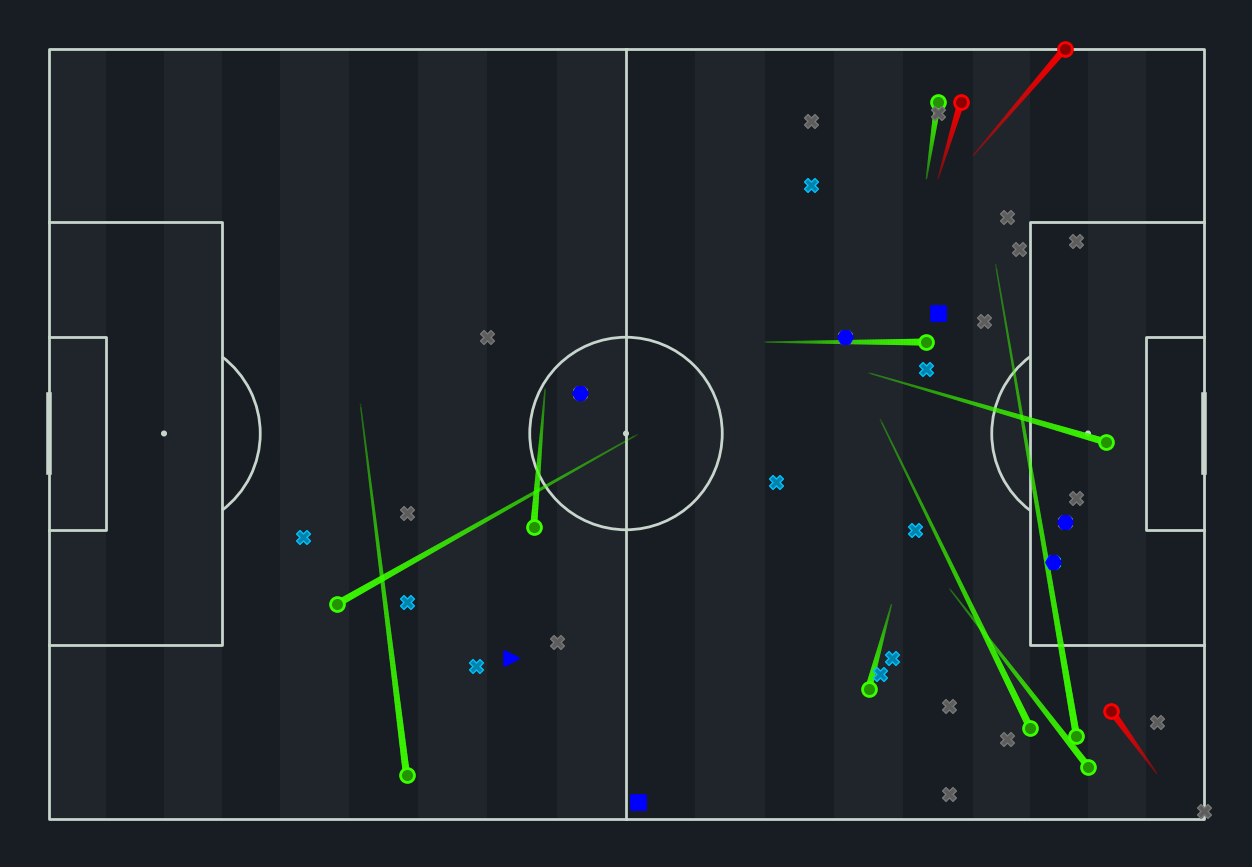

In [29]:
# Initialize the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#181D23', line_color='#c7d5cc', stripe=True, stripe_color='#20252B')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#181D23')

# Loop through the events in the DataFrame
for x in range(len(df['x'])):
    event_type = df['outcome'][x].lower()

    if event_type == 'p_successful':
        pitch.lines(df["x"][x], df["y"][x],
                    df["endX"][x], df["endY"][x], color="#3BFF00",
                    comet=True, transparent=True, alpha_start=0.2, alpha_end=0.8,
                    zorder=2, ax=ax)
        
        pitch.scatter(df["endX"][x], df["endY"][x],
                      color="#239400", edgecolor="#3BFF00", ax=ax,
                      s=100, lw=2, zorder=3)
        
    elif event_type == 'p_unsuccessful':  # Added event_type condition
        pitch.lines(df["x"][x], df["y"][x],
                    df["endX"][x], df["endY"][x], color="#FE0000",
                    comet=True, transparent=True, alpha_start=0.2, alpha_end=0.8,
                    zorder=2, ax=ax)
        
        pitch.scatter(df["endX"][x], df["endY"][x],
                      color="#8E0000", edgecolor="#FE0000", ax=ax,
                      s=100, lw=2, zorder=3)

    elif event_type == 'd_successful':
        pitch.scatter(df["x"][x], df["y"][x],
                      color="#0183AC", marker='X', edgecolor='#00C2FF', ax=ax,
                      s=100, lw=1, zorder=3)
            
    elif event_type == 'd_unsuccessful':
        pitch.scatter(df["x"][x], df["y"][x],
                      color="#5d5d5d", marker='X', edgecolor='#777777', ax=ax,
                      s=100, lw=1, zorder=3)
            
    elif event_type == 'a_successful':
        pitch.scatter(df["x"][x], df["y"][x],
                      color="blue", marker='H', ax=ax,
                      s=100, lw=2, zorder=3)
            
    elif event_type == 'a_unsuccessful':
        pitch.scatter(df["x"][x], df["y"][x],
                      color="blue", marker='H', ax=ax,
                      s=100, lw=2, zorder=3)
            
    elif event_type == 'dr_successful':
        pitch.scatter(df["x"][x], df["y"][x],
                      color="blue", marker='>', ax=ax,
                      s=100, lw=2, zorder=3)
            
    elif event_type == 'i_successful':
        pitch.scatter(df["x"][x], df["y"][x],
                      color="blue", marker='s', ax=ax,
                      s=100, lw=2, zorder=3)

plt.show()